In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Medicine_Details.csv')

In [4]:
df.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [5]:
df.tail()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
11820,Zilarta-CT 40/6.25 Tablet,Azilsartan medoxomil (40mg) + Chlorthalidone (...,Hypertension (high blood pressure),Dizziness Tiredness Decreased potassium level ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Micro Labs Ltd,67,33,0
11821,Zipcoz Tablet,Chromium Picolinate (100mcg) + D-Chiro Inosito...,Polycystic ovarian syndrome (PCOS),Rash Nausea Paresthesia tingling or pricking s...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Lifeline Remedies India Pvt Ltd,0,80,20
11822,Zestasil 100 Tablet,Sildenafil (100mg),Treatment of Erectile dysfunction,Flushing sense of warmth in the face ears neck...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",TBG pharma ltd,25,75,0
11823,Zedruff Shampoo,Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v),Treatment of Dandruff,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Minova Life Sciences Pvt Ltd,0,0,100
11824,Zedruff Shampoo,Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v),Treatment of Dandruff,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Minova Life Sciences Pvt Ltd,0,0,100


In [6]:
df['Uses'] = df['Uses'].str.lstrip()

In [7]:
df.describe()


,Excellent Review %,Average Review %,Poor Review %
count,11825.000000,11825.000000,11825.000000
mean,38.516025,35.756364,25.727611
std,25.225343,18.268134,23.991985
min,0.000000,0.000000,0.000000
25%,22.000000,27.000000,0.000000
50%,34.000000,35.000000,22.000000
75%,51.000000,47.000000,35.000000
max,100.000000,88.000000,100.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11825 non-null  object
 1   Composition         11825 non-null  object
 2   Uses                11825 non-null  object
 3   Side_effects        11825 non-null  object
 4   Image URL           11825 non-null  object
 5   Manufacturer        11825 non-null  object
 6   Excellent Review %  11825 non-null  int64 
 7   Average Review %    11825 non-null  int64 
 8   Poor Review %       11825 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 831.6+ KB


In [9]:
df.columns

Index(['Medicine Name', 'Composition', 'Uses', 'Side_effects', 'Image URL',
       'Manufacturer', 'Excellent Review %', 'Average Review %',
       'Poor Review %'],
      dtype='object')

# Cleaning of Data

In [10]:
df.isnull().sum()

Medicine Name         0
Composition           0
Uses                  0
Side_effects          0
Image URL             0
Manufacturer          0
Excellent Review %    0
Average Review %      0
Poor Review %         0
dtype: int64

In [11]:
df.duplicated().sum()

84

In [12]:
clean_df = df.drop_duplicates()

In [13]:
clean_df.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lung...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [14]:
import re

# Function to process side effects and create a list
def process_side_effects(side_effects_str):
    # Check if side effects are 'No common side effects seen', if yes, replace with an empty string
    if side_effects_str == 'No common side effects seen':
        return []
    else:
        # Use regular expression to split side effects based on capital letters
        side_effects_list = re.findall('[A-Z][^A-Z]*', side_effects_str)

        # Capitalize the first letter of each side effect
        side_effects_list = [side_effect.strip() for side_effect in side_effects_list]

        return side_effects_list

# Apply the function to create a new column 'SideEffectsList'
df['SideEffectsList'] = df['Side_effects'].apply(process_side_effects)

# Display the DataFrame with the new column
df

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %,SideEffectsList
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lung...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22,"[Rectal bleeding, Taste change, Headache, Nose..."
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18,"[Vomiting, Nausea, Diarrhea, Mucocutaneous can..."
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21,"[Nausea, Abdominal pain, Diarrhea]"
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35,"[Nausea, Vomiting, Diarrhea, Upset stomach, St..."
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29,"[Headache, Diarrhea, Gastrointestinal disturba..."
...,...,...,...,...,...,...,...,...,...,...
11820,Zilarta-CT 40/6.25 Tablet,Azilsartan medoxomil (40mg) + Chlorthalidone (...,Hypertension (high blood pressure),Dizziness Tiredness Decreased potassium level ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Micro Labs Ltd,67,33,0,"[Dizziness, Tiredness, Decreased potassium lev..."
11821,Zipcoz Tablet,Chromium Picolinate (100mcg) + D-Chiro Inosito...,Polycystic ovarian syndrome (PCOS),Rash Nausea Paresthesia tingling or pricking s...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Lifeline Remedies India Pvt Ltd,0,80,20,"[Rash, Nausea, Paresthesia tingling or prickin..."
11822,Zestasil 100 Tablet,Sildenafil (100mg),Treatment of Erectile dysfunction,Flushing sense of warmth in the face ears neck...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",TBG pharma ltd,25,75,0,[Flushing sense of warmth in the face ears nec...
11823,Zedruff Shampoo,Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v),Treatment of Dandruff,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Minova Life Sciences Pvt Ltd,0,0,100,[Application site reactions burning irritation...


# Exploratory Data Analysis

Since we managed to remove the null values and the duplicated values, we can now do some exploratory data analysis to see what the data is telling us. We can see which ones have a similar composition

In [15]:
composition_value_counts = clean_df['Composition'].value_counts()
composition_value_counts

Composition
Luliconazole (1% w/w)                                                                                   98
Levocetirizine (5mg) + Montelukast (10mg)                                                               76
Ketoconazole (2% w/w)                                                                                   61
Domperidone (30mg) + Rabeprazole (20mg)                                                                 59
Itraconazole (100mg)                                                                                    53
                                                                                                        ..
Digoxin (0.25mg)                                                                                         1
Sulphacetamide (20% w/v)                                                                                 1
Furosemide (10mg/ml)                                                                                     1
Chloroquine (500mg)      

In [16]:
composition_names = composition_value_counts.index.tolist()
salts_name = composition_names[:30]
salts_name

['Luliconazole (1% w/w)',
 'Levocetirizine (5mg) + Montelukast (10mg)',
 'Ketoconazole (2% w/w)',
 'Domperidone (30mg) + Rabeprazole (20mg)',
 'Itraconazole (100mg)',
 'Telmisartan (40mg)',
 'Itraconazole (200mg)',
 'Domperidone (30mg) + Pantoprazole (40mg)',
 'Telmisartan (40mg) + Amlodipine (5mg)',
 'Glimepiride (2mg) + Metformin (500mg)',
 'Metformin (500mg)',
 'Minoxidil (5% w/v)',
 'Ketoconazole (2% w/v) + Zinc pyrithione (1% w/v)',
 'Amoxycillin  (500mg) +  Clavulanic Acid (125mg)',
 'Rabeprazole (20mg)',
 'Levocetirizine (5mg)',
 'Glimepiride (2mg) + Metformin (500mg) + Pioglitazone (15mg)',
 'Teneligliptin (20mg)',
 'Methylcobalamin (750mcg) + Pregabalin (75mg)',
 'Carboxymethylcellulose (0.5% w/v)',
 'Terbinafine (1% w/w)',
 'Glimepiride (2mg) + Metformin (500mg) + Voglibose (0.2mg)',
 'Pantoprazole (40mg)',
 'Montelukast (10mg) + Fexofenadine (120mg)',
 'Metformin (500mg) + Teneligliptin (20mg)',
 'Telmisartan (40mg) + Hydrochlorothiazide (12.5mg)',
 'Glimepiride (1mg) + Metf

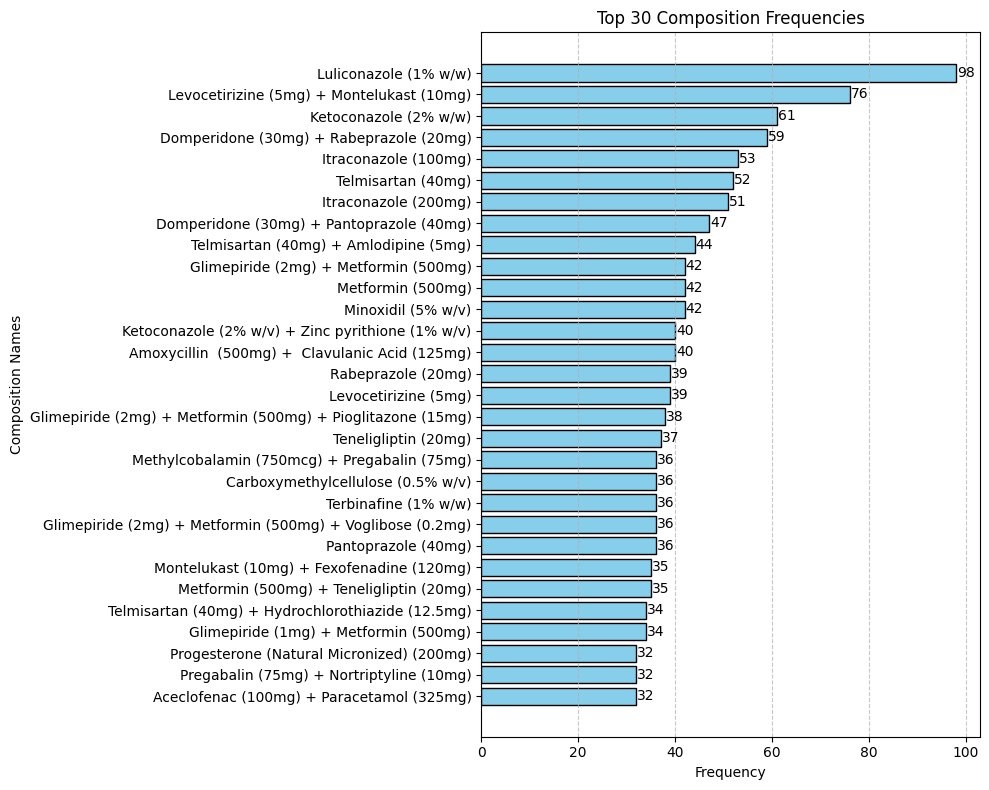

In [17]:
import matplotlib.pyplot as plt

# Assuming 'salts_name' contains the top 30 composition names
# Replace 'salts_name' with your list of compositions

# Generate frequencies for each composition name
frequencies = [clean_df['Composition'].value_counts()[name] for name in salts_name]

# Create a bar plot with customizations
plt.figure(figsize=(10, 8))
plt.barh(salts_name, frequencies, color='skyblue', edgecolor='black')

plt.xlabel('Frequency')
plt.ylabel('Composition Names')
plt.title('Top 30 Composition Frequencies')
plt.gca().invert_yaxis()  # Invert y-axis to display the most frequent at the top

# Add frequency values as text on the bars
for i, v in enumerate(frequencies):
    plt.text(v + 0.2, i, str(v), color='black', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

In [18]:
# Get the 10 value counts of side effects so we don't flood the notebook with too much stuff
side_effects_counts = clean_df['Side_effects'].value_counts()

# Create a dictionary to store medicines for each side effect
side_effects_medicines = {}

# Loop through unique side effects and collect associated medicines
for side_effect, count in side_effects_counts.items():
    # Filter DataFrame for each unique side effect
    medicines_for_side_effect = clean_df.loc[clean_df['Side_effects'] == side_effect, 'Medicine Name'].tolist()

    # Store the list of medicines for the side effect in the dictionary
    side_effects_medicines[side_effect] = medicines_for_side_effect

# Loop through the top 10 side effects and print their information
for idx, (side_effect, medicines) in enumerate(side_effects_medicines.items()):
    if idx >= 10:
        break  # Exit loop after printing 10 occurrences

    print(f"Side Effect: {side_effect}")
    print(f"Number of Occurrences: {side_effects_counts[side_effect]}")
    print(f"Medicines: {medicines}")
    print("------------------------")

Side Effect: Application site reactions burning irritation itching and redness
Number of Occurrences: 389
Medicines: ['Anovate Cream', 'Aziderm 20% Cream', 'Acivir Cream', 'Aziderm 10% Cream', 'Aziderm 10% Gel', 'Acivir Cream', 'Aziderm 20% Gel', 'AF-K Lotion', 'Aziderm 15% Gel', 'Acetik-HC Ear Drop', 'Atrodex-C Eye Drop', 'Afderm-MN + Cream', 'Ara Eye Drop', 'Azifast Gel', 'Amfy Gel', 'Adgaba Gel', 'Azobril Cream', 'Azobril Forte 20% Cream', 'AF-K Lotion', 'Allyzole Shampoo', 'Anti Druf Lotion', 'Amfy Gel', 'Afitra Cream', 'Betadine 10% Solution', 'Betadine 10% Ointment', 'Betadine 2% Gargle Mint', 'Betadine Powder', 'Betadine 2% Gargle Mint', 'Betadine Vaginal Pessaries', 'Bactafuz Cream', 'Betadine 5% Ointment', 'Betakind Gargle', 'Betadine 10% Solution', 'Betadine 5% Ointment', 'Bionect Ointment', 'Betadine 7.5% Surgical Scrub', 'Betadine Surgical Scrub 7.5% Solution', 'Biospor 1% Cream', 'Danclear  Shampoo', 'Diprolite Cream', 'Diprobate S Plus Ointment', 'Danclear  Cream', 'Dencr

In [19]:
# Get the value counts of uses
uses_counts = clean_df['Uses'].value_counts().head(10)

# Create a dictionary to store medicines for each use
uses_medicines = {}

# Loop through unique uses and collect associated medicines
for use, count in uses_counts.items():
    # Filter DataFrame for each unique use
    medicines_for_use = clean_df.loc[clean_df['Uses'] == use, 'Medicine Name'].tolist()

    # Store the list of medicines for the use in the dictionary
    uses_medicines[use] = medicines_for_use

# Display only the first 10 uses and their associated medicines
for idx, (use, medicines) in enumerate(uses_medicines.items()):
    if idx >= 10:
        break  # Exit loop after printing 10 occurrences

    print(f"Use: {use}")
    print(f"Number of Occurrences: {uses_counts[use]}")
    print(f"Medicines: {medicines}")
    print("------------------------")

Use: Treatment of Type 2 diabetes mellitus
Number of Occurrences: 904
Medicines: ['Amaryl 1mg Tablet', 'Ajaduo 25mg/5mg Tablet', 'Amaryl 2mg Tablet', 'Azulix 1 MF Tablet PR', 'Azulix 2 MF Tablet PR', 'Amaryl MV 2mg Tablet SR', 'Amaryl MV 1mg Tablet SR', 'Ajaduo 10mg/5mg Tablet', 'Amaryl M Forte 2mg Tablet PR', 'Amaryl M Forte 1mg Tablet PR', 'Azulix 1 Tablet', 'Azulix 2 MF Forte Tablet PR', 'Azulix 3 MF Tablet PR', 'Amaryl 3mg Tablet', 'Azulix 2 Tablet', 'Azulix 1 MF Forte Tablet PR', 'Aloja 25 Tablet', 'Azulix 4 MF Tablet PR', 'Azulix MV 2/0.2 Tablet SR', 'Azulix MV 2mg/500mg/0.3mg Tablet SR', 'Aim7 60 XR Tablet', 'Aplevant 0.75mg Pre-filled Pen', 'Azulix 4 MF Forte Tablet PR', 'Abvida 50mg Tablet', 'Azulix 0.5 MF Tablet PR', 'Azulix 3 Tablet', 'Azulix MV 1mg/500mg/0.3mg Tablet SR', 'Aloja 12.5 Tablet', 'Azulix 4 Tablet', 'Advog 0.3 Tablet', 'Acmeglim-MV 2 Tablet SR', 'Azukon Tablet', 'Advog 0.2 Tablet', 'Advog M 0.3 Plus Tablet', 'Abvida-M 50mg/1000mg Eazy Glide Tablet', 'Azmet-VG 1 

# Data Visualization

<ipython-input-20-2c33447aa086>:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


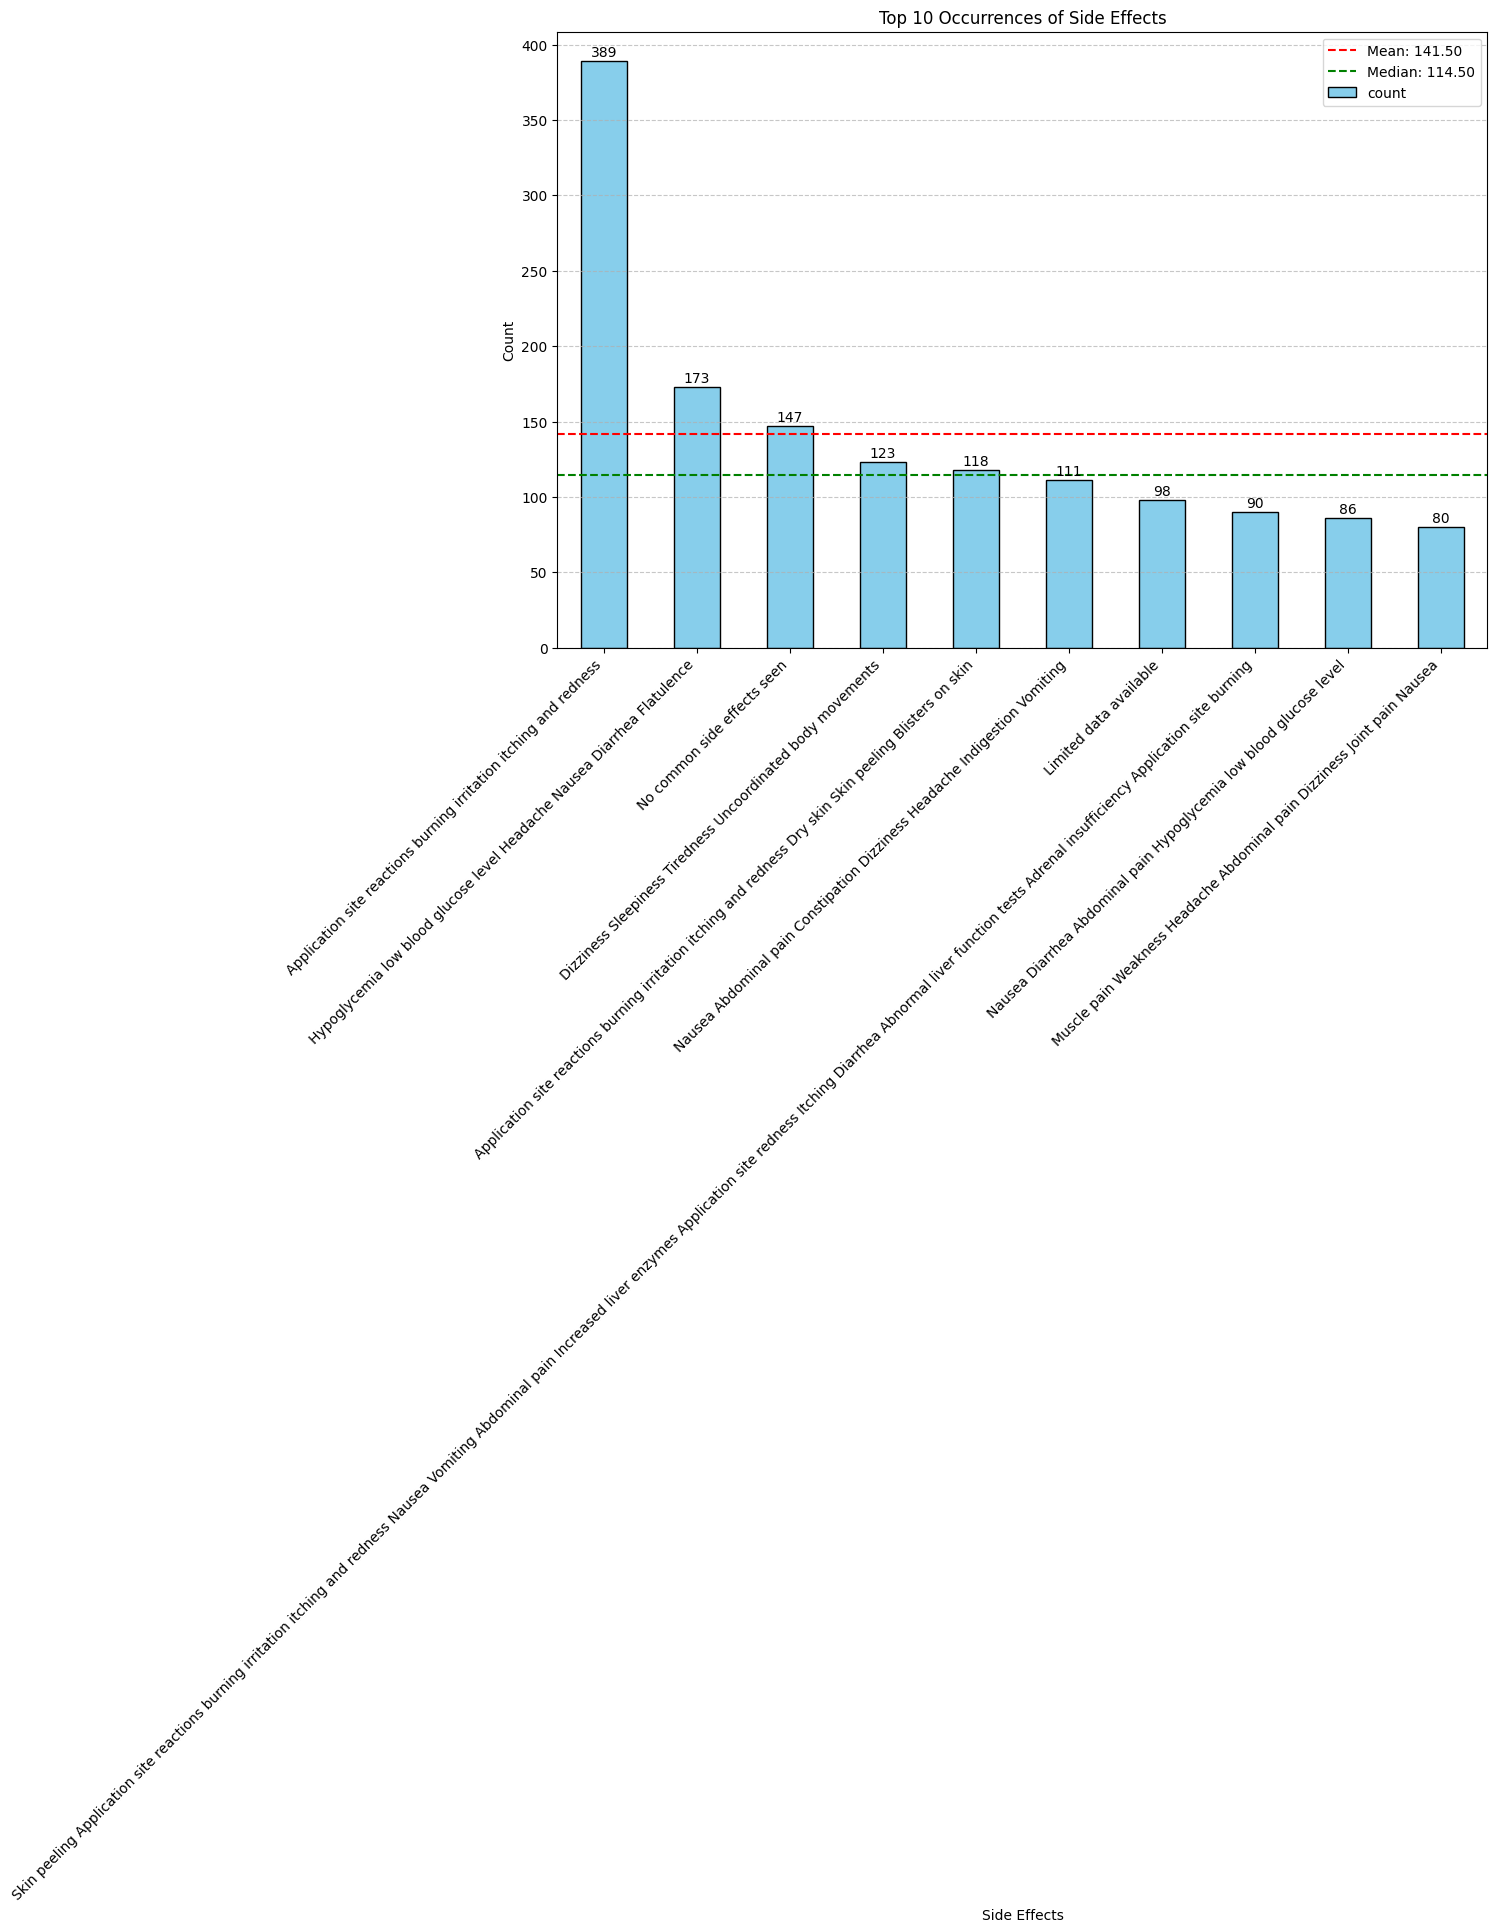

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'clean_df' contains the necessary data

# Get the value counts of side effects and limit to top 10
side_effects_counts = clean_df['Side_effects'].value_counts().head(10)

# Create a dictionary to store medicines for each side effect
side_effects_medicines = {}

# Loop through unique side effects and collect associated medicines
for side_effect in side_effects_counts.index:
    # Filter DataFrame for each unique side effect
    medicines_for_side_effect = clean_df.loc[clean_df['Side_effects'] == side_effect, 'Medicine Name'].tolist()

    # Store the list of medicines for the side effect in the dictionary
    side_effects_medicines[side_effect] = medicines_for_side_effect

# Create a bar chart of top 10 side effects and their counts with improved aesthetics
plt.figure(figsize=(12, 8))
bar_plot = side_effects_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding annotations for each bar with custom formatting
for i, count in enumerate(side_effects_counts):
    plt.text(i, count + 1, f'{count}', ha='center', va='bottom', fontsize=10)

# Draw a horizontal line for the mean count
mean_count = side_effects_counts.mean()
plt.axhline(mean_count, color='red', linestyle='--', label=f'Mean: {mean_count:.2f}')
plt.legend()

# Draw a horizontal line for the median count
median_count = side_effects_counts.median()
plt.axhline(median_count, color='green', linestyle="--", label=f'Median: {median_count:.2f}')
plt.legend()

plt.title('Top 10 Occurrences of Side Effects')
plt.xlabel('Side Effects')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

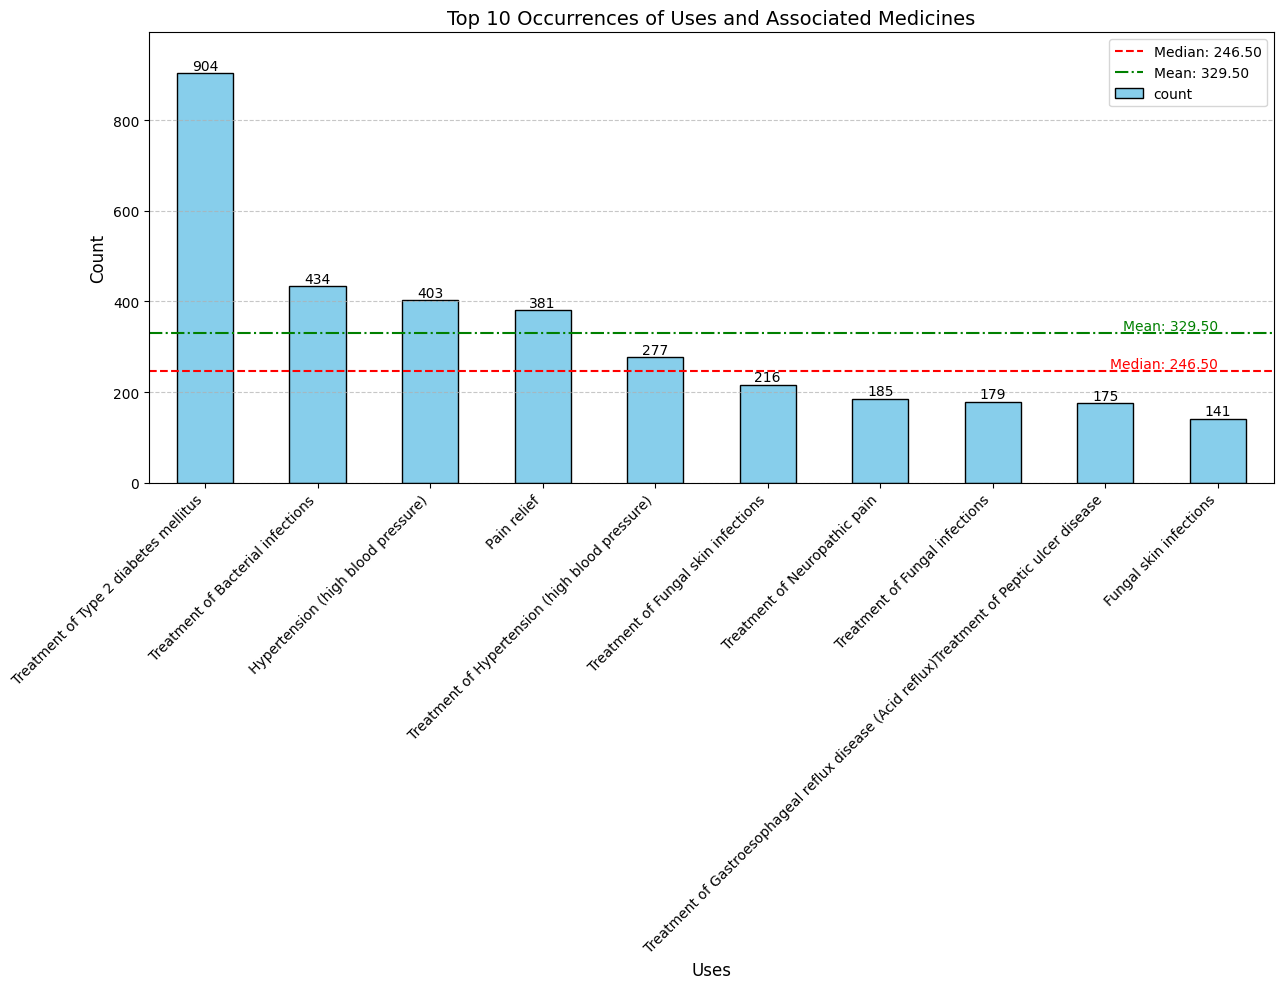

In [21]:
top_10_uses = uses_counts.head(10)

# Calculate median and mean values
median_value = top_10_uses.median()
mean_value = top_10_uses.mean()

# Create a bar chart for top 10 uses and their occurrences
plt.figure(figsize=(13, 10))
bar_plot = top_10_uses.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding annotations for each bar
for i, count in enumerate(top_10_uses):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)

# Plotting median line with annotation
plt.axhline(median_value, color='red', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')
plt.text(len(top_10_uses) - 1, median_value, f'Median: {median_value:.2f}', color='red', va='bottom', ha='right', fontsize=10)

# Plotting mean line with annotation
plt.axhline(mean_value, color='green', linestyle='-.', linewidth=1.5, label=f'Mean: {mean_value:.2f}')
plt.text(len(top_10_uses) - 1, mean_value, f'Mean: {mean_value:.2f}', color='green', va='bottom', ha='right', fontsize=10)

plt.title('Top 10 Occurrences of Uses and Associated Medicines', fontsize=14)
plt.xlabel('Uses', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, top_10_uses.max() * 1.1)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Recommendation System

We can look at two recommendation system:
> * Recommend medicine that are similar to the medicine that we are querying, in case we run out of inventory for that particular medicine
> * Recommend various medicines for particular symptoms

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
!pip install nltk pandas

In [24]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Downloading NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initializing the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define additional stop words to remove
additional_stopwords = ['treatment', 'prevention','pain','infection']

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords and lemmatize the words
    filtered_words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english') and word not in additional_stopwords]
    # Concatenate words without spaces
    return " ".join(filtered_words)

# Assuming you have a DataFrame 'clean_df' with a column 'Uses'
# Applying the preprocess function to each element in the column 'Uses'
clean_df['Processed_Uses'] = clean_df['Uses'].apply(preprocess_text)

# Show the processed column
print(clean_df[['Uses', 'Processed_Uses']])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                                    Uses  \
0      Cancer of colon and rectum Non-small cell lung...   
1                      Treatment of Bacterial infections   
2                      Treatment of Bacterial infections   
3                          Treatment of Cough with mucus   
4      Treatment of Gastroesophageal reflux disease (...   
...                                                  ...   
11819  Local anesthesia (Numb tissues in a specific a...   
11820                 Hypertension (high blood pressure)   
11821                 Polycystic ovarian syndrome (PCOS)   
11822                  Treatment of Erectile dysfunction   
11823                              Treatment of Dandruff   

                                          Processed_Uses  
0      cancer colon rectum non-small cell lung cancer...  
1                                    bacterial infection  
2                                    bacterial infection  
3                                          

<ipython-input-24-1eac4e2f75a3>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Processed_Uses'] = clean_df['Uses'].apply(preprocess_text)


In [25]:
# Define a function to remove the word "infection" from a string if present
def clean_word(word):
    # Define words to remove
    words_to_remove = ["infection", "pain", "treatment", "prevention", "disorder",
                       "infectiontreatment", "infectionstreatment", "disease",
                       'wellbeing','need','due','pm','benign','certain','due',
                       'functional','severe','affecting']

    # Remove specified words from the word
    for word_to_remove in words_to_remove:
        word = word.replace(word_to_remove, "")

    # Check if "treatment" or "infection" appears at the end of the word
    if word.endswith("treatment"):
        # Remove "treatment" from the end of the word
        word = word[:-len("treatment")]
    elif word.endswith("infection"):
        # Remove "infection" from the end of the word
        word = word[:-len("infection")]

    return word

# # Test the function
# word = "infectiontreatment"
# cleaned_word = clean_word(word)
# print(cleaned_word)  # Output: ""


# Apply the function to the column 'Processed_Uses'
clean_df['Processed_Uses'] = clean_df['Processed_Uses'].apply(clean_word)


<ipython-input-25-7b25516f6cad>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Processed_Uses'] = clean_df['Processed_Uses'].apply(clean_word)


In [26]:
clean_df['words_list'] = clean_df['Processed_Uses'].str.split()

# Display the DataFrame to see the result
print(clean_df)

                   Medicine Name  \
0        Avastin 400mg Injection   
1       Augmentin 625 Duo Tablet   
2            Azithral 500 Tablet   
3               Ascoril LS Syrup   
4              Aciloc 150 Tablet   
...                          ...   
11819         Zenegra Lido Spray   
11820  Zilarta-CT 40/6.25 Tablet   
11821              Zipcoz Tablet   
11822        Zestasil 100 Tablet   
11823            Zedruff Shampoo   

                                             Composition  \
0                                    Bevacizumab (400mg)   
1        Amoxycillin  (500mg) +  Clavulanic Acid (125mg)   
2                                   Azithromycin (500mg)   
3      Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...   
4                                     Ranitidine (150mg)   
...                                                  ...   
11819                               Lidocaine (9.5% w/w)   
11820  Azilsartan medoxomil (40mg) + Chlorthalidone (...   
11821  Chromium Picolinate 

<ipython-input-26-c33a9d2e85a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['words_list'] = clean_df['Processed_Uses'].str.split()


In [27]:
clean_df

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %,Processed_Uses,words_list
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lung...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22,cancer colon rectum non-small cell lung cancer...,"[cancer, colon, rectum, non-small, cell, lung,..."
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18,bacterial,[bacterial]
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21,bacterial,[bacterial]
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35,cough mucus,"[cough, mucus]"
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29,gastroesophageal reflux ( acid reflux ) pepti...,"[gastroesophageal, reflux, (, acid, reflux, ),..."
...,...,...,...,...,...,...,...,...,...,...,...
11819,Zenegra Lido Spray,Lidocaine (9.5% w/w),Local anesthesia (Numb tissues in a specific a...,Allergic reaction Application site reactions b...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alkem Laboratories Ltd,24,19,57,local anesthesia ( numb tissue specific area ),"[local, anesthesia, (, numb, tissue, specific,..."
11820,Zilarta-CT 40/6.25 Tablet,Azilsartan medoxomil (40mg) + Chlorthalidone (...,Hypertension (high blood pressure),Dizziness Tiredness Decreased potassium level ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Micro Labs Ltd,67,33,0,hypertension ( high blood pressure ),"[hypertension, (, high, blood, pressure, )]"
11821,Zipcoz Tablet,Chromium Picolinate (100mcg) + D-Chiro Inosito...,Polycystic ovarian syndrome (PCOS),Rash Nausea Paresthesia tingling or pricking s...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Lifeline Remedies India Pvt Ltd,0,80,20,polycystic ovarian syndrome ( pcos ),"[polycystic, ovarian, syndrome, (, pcos, )]"
11822,Zestasil 100 Tablet,Sildenafil (100mg),Treatment of Erectile dysfunction,Flushing sense of warmth in the face ears neck...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",TBG pharma ltd,25,75,0,erectile dysfunction,"[erectile, dysfunction]"


In [28]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_uses = tfidf_vectorizer.fit_transform(clean_df['Uses'].astype(str))
tfidf_matrix_composition = tfidf_vectorizer.fit_transform(clean_df['Composition'].astype(str))
tfidf_matrix_side_effects = tfidf_vectorizer.fit_transform(clean_df['Side_effects'].astype(str))

In [29]:
tfidf_matrix_uses

<11741x698 sparse matrix of type '<class 'numpy.float64'>'
	with 50544 stored elements in Compressed Sparse Row format>

In [30]:
# Ensure all matrices have the same number of rows
min_rows = min(tfidf_matrix_uses.shape[0], tfidf_matrix_composition.shape[0], tfidf_matrix_side_effects.shape[0])

# Trim matrices to have the same number of rows
tfidf_matrix_uses = tfidf_matrix_uses[:min_rows]
tfidf_matrix_composition = tfidf_matrix_composition[:min_rows]
tfidf_matrix_side_effects = tfidf_matrix_side_effects[:min_rows]

In [31]:
from scipy.sparse import hstack

# Combine the matrices horizontally
tfidf_matrix_combined = hstack((tfidf_matrix_uses, tfidf_matrix_composition, tfidf_matrix_side_effects))

tfidf_matrix_combined

<11741x3008 sparse matrix of type '<class 'numpy.float64'>'
	with 228599 stored elements in Compressed Sparse Row format>

In [32]:
cosine_sim_combined = cosine_similarity(tfidf_matrix_combined, tfidf_matrix_combined)
cosine_sim_combined

array([[1.        , 0.        , 0.01533593, ..., 0.05146093, 0.02642958,
        0.        ],
       [0.        , 1.        , 0.44631417, ..., 0.01307189, 0.02181966,
        0.02340439],
       [0.01533593, 0.44631417, 1.        , ..., 0.00976893, 0.04480567,
        0.02340439],
       ...,
       [0.05146093, 0.01307189, 0.00976893, ..., 1.        , 0.12351656,
        0.        ],
       [0.02642958, 0.02181966, 0.04480567, ..., 0.12351656, 1.        ,
        0.01227982],
       [0.        , 0.02340439, 0.02340439, ..., 0.        , 0.01227982,
        1.        ]])

In [33]:
def recommend_medicines_by_usage(medicine_name, tfidf_matrix_uses, clean_df):
    # Get the index of the medicine
    medicine_index = clean_df[clean_df['Medicine Name'] == medicine_name].index[0]

    # Calculate cosine similarity between the given medicine and others based on usage
    sim_scores = cosine_similarity(tfidf_matrix_uses, tfidf_matrix_uses[medicine_index])

    # Get indices of top similar medicines (excluding the queried one)
    sim_scores = sim_scores.flatten()
    similar_indices = sim_scores.argsort()[::-1][1:6]  # Top 5 similar medicines

    # Get recommended medicine names
    recommended_medicines = clean_df.iloc[similar_indices]['Medicine Name'].tolist()

    return recommended_medicines

In [34]:
query = "Lobet 20mg Injection"
# query="xyx"
recommended_medicines = recommend_medicines_by_usage(query, tfidf_matrix_uses, clean_df)
print(recommended_medicines)

['Lubrijoint 500 Tablet', 'Ostogard Gm Tablet', 'Lubricart-D Tablet', 'Arthocerin-DG Tablet', 'Orcerin Capsule']


In [35]:
# def recommend_medicines_by_symptoms(symptoms, tfidf_vectorizer, tfidf_matrix_uses, clean_df):
#     # Create a string from the given symptoms
#     symptom_str = ' '.join(symptoms)
#     # print(symptom_str)
#     # Transform the symptom string using the TF-IDF vectorizer
#     symptom_vector = tfidf_vectorizer.transform([symptom_str])

#     # Calculate cosine similarity between the symptom vector and all medicine vectors
#     sim_scores = cosine_similarity(tfidf_matrix_uses, symptom_vector)

#     # Get indices of top similar medicines
#     sim_scores = sim_scores.flatten()
#     similar_indices = sim_scores.argsort()[::-1][:20]  # Top 5 similar medicines

#     # Get recommended medicine names
#     recommended_medicines = clean_df.iloc[similar_indices]['Medicine Name'].tolist()

#     return recommended_medicines

In [36]:
def recommend_medicines_by_symptoms(symptoms, tfidf_vectorizer, tfidf_matrix_uses, clean_df):
    # Create a string from the given symptoms
    symptom_str = ' '.join(symptoms)

    # Transform the symptom string using the TF-IDF vectorizer
    symptom_vector = tfidf_vectorizer.transform([symptom_str])
    # print(symptom_vector)

    # Calculate cosine similarity between the symptom vector and all medicine vectors
    sim_scores = cosine_similarity(tfidf_matrix_uses, symptom_vector)

    # Get indices of top similar medicines
    sim_scores = sim_scores.flatten()
    similar_indices = sim_scores.argsort()[::-1][:30]  # Sort in descending order of similarity

    # Get recommended medicine names based on similarity scores, prioritizing less poor reviews
    recommended_medicines = []
    count = 0
    top_similar_medicines = clean_df.iloc[similar_indices]
    top_similar_medicines = top_similar_medicines.sort_values(by=['Poor Review %', 'Excellent Review %'], ascending=[True, False])

    for index, medicine in top_similar_medicines.iterrows():
        if count >= 15:
            break
        recommended_medicines.append(medicine['Medicine Name'])
        count += 1

    return recommended_medicines


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer for symptoms
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the 'Uses' column to create the TF-IDF matrix for symptoms
tfidf_matrix_uses = tfidf.fit_transform(clean_df['Uses'])

# Now, you can call the recommend_medicines_by_symptoms function
query = ["legpain"]  # Convert the single symptom to a list
recommended_medicines = recommend_medicines_by_symptoms(query, tfidf, tfidf_matrix_uses, clean_df)
print(recommended_medicines)

['Itgo 50DT Tablet', 'Inovas F Tablet', 'Intadine Solution', 'Intalon  Liquid', 'Itorate Capsule', 'Itraclar 200 Capsule', 'Ilosure 6mg Tablet', 'Iversafe Lotion', 'Instigo-D Tablet', 'Itgo-MT Cream', 'Irimist V Eye Drop', 'Janumet 50mg/1000mg Tablet', 'Jardiance 10mg Tablet', 'Januvia 100mg Tablet', 'Just Tears Eye Drop']


In [38]:
medicines = clean_df[clean_df['Medicine Name'].isin(recommended_medicines)]

In [397]:
# prompt: drop side effects column of clean_df

clean_df = clean_df.drop('Side_effects', axis=1)


#UCB

In [395]:
# Define the size of the new column (number of rows in clean_df)
num_rows = len(clean_df)

# Create a list containing lists with all elements as 1
rewards_list = [[1] for _ in range(num_rows)]

# Append the list as a new column to clean_df
clean_df['Rewards'] = rewards_list


<ipython-input-395-47be69180670>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Rewards'] = rewards_list


In [40]:
medicines

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %,Processed_Uses,words_list
3914,Itgo-MT Cream,Mometasone (0.1% w/w) + Terbinafine (1% w/w),Treatment of Fungal skin infections,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Salsim Pharma Pvt Ltd,50,50,0,fungal skin,"[fungal, skin]"
3918,Intadine Solution,Povidone Iodine (5% w/v),Treatment and prevention of Wound infection,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Intas Pharmaceuticals Ltd,100,0,0,wound,[wound]
3921,Irimist V Eye Drop,Hydroxypropylmethylcellulose (NA),Dry eyes,Blurred vision Eye irritation Eye pain Eye red...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Indoco Remedies Ltd,33,67,0,dry eye,"[dry, eye]"
3923,Instigo-D Tablet,Domperidone (30mg) + Rabeprazole (20mg),Treatment of Gastroesophageal reflux disease (...,Diarrhea Stomach pain Dryness in mouth Headach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Mebio Labs Pvt Ltd,50,50,0,gastroesophageal reflux ( acid reflux ) pepti...,"[gastroesophageal, reflux, (, acid, reflux, ),..."
3924,Ilosure 6mg Tablet,Iloperidone (6mg),Schizophrenia Mania,Dizziness Dryness in mouth Fatigue Nasal conge...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Sun Pharmaceutical Industries Ltd,67,33,0,schizophrenia mania,"[schizophrenia, mania]"
3927,Itraclar 200 Capsule,Itraconazole (200mg),Treatment of Fungal infections,Nausea Abdominal pain Constipation Dizziness H...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Torrent Pharmaceuticals Ltd,67,33,0,fungal,[fungal]
3929,Iversafe Lotion,Ivermectin (0.5% w/v),RosaceaTreatment of Parasitic infections,Application site reactions burning irritation ...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Rockmed Pharma Pvt. Ltd.,50,50,0,rosacea parasitic,"[rosacea, parasitic]"
3930,Itorate Capsule,Itraconazole (100mg),Treatment of Fungal infections,Nausea Abdominal pain Constipation Dizziness H...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Mesova Pharmaceuticals,67,33,0,fungal,[fungal]
3932,Inovas F Tablet,Atorvastatin (10mg) + Fenofibrate (160mg),Treatment of High cholesterolPrevention of Hea...,Nausea Stomach pain Constipation Flatulence He...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Invision Medi Sciences Pvt Ltd,100,0,0,high cholesterol heart attack,"[high, cholesterol, heart, attack]"
3934,Intalon Liquid,Cetrimide (NA) + Chlorhexidine Gluconate (NA),Treatment of Wound infection,Skin irritation,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Intas Pharmaceuticals Ltd,67,33,0,wound,[wound]


In [41]:
import math

def recommend_medicine_ucb(medicines_rewards, alpha):
    """Recommend a medicine using the Upper Confidence Bound (UCB) algorithm."""
    best_medicine = None
    max_ucb = float('-inf')

    for medicine, rewards in medicines_rewards.items():
        # Calculate the average reward for the medicine
        avg_reward = sum(rewards) / len(rewards)
        # Calculate the number of times the medicine has been recommended
        n = len(rewards)
        # Calculate the upper confidence bound (UCB) for the medicine
        ucb = avg_reward + (alpha * math.sqrt(math.log(n)) / n)

        # Update the best medicine if its UCB is higher
        if ucb > max_ucb:
            best_medicine = medicine
            max_ucb = ucb

    return best_medicine


# Create an empty dictionary to store medicines and their corresponding rewards
medicines_rewards = {}

# Populate the dictionary with medicines and their rewards
for medicine, reward_list in zip(medicines['Medicine Name'], medicines['Rewards']):
    medicines_rewards[medicine] = reward_list

# Example usage
alpha = 0.1  # Exploration-exploitation tradeoff parameter
recommended_medicine = recommend_medicine_ucb(medicines_rewards, alpha)
print("Recommended medicine:", recommended_medicine)




KeyError: 'Rewards'

In [ ]:
def update_reward(medicine, reward):
    # Find the index of the row where 'Medicine Name' is equal to 'medicine'
    index = clean_df.index[clean_df['Medicine Name'] == medicine].tolist()[0]

    # Get the rewards list for the corresponding medicine
    rewards_list = clean_df.at[index, 'Rewards']

    # Append the new reward to the rewards list
    rewards_list.append(reward)

    # Update the 'Rewards' column in the DataFrame
    clean_df.at[index, 'Rewards'] = rewards_list

In [ ]:
# Simulate receiving feedback (reward) for the recommended medicine
feedback_reward = 0  # Assume the feedback is positive (1) for this example

# Update the reward array of the recommended medicine with the received feedback
update_reward(recommended_medicine, feedback_reward)

In [ ]:
clean_df[clean_df['Medicine Name'] == 'Instigo-D Tablet']

In [ ]:
# prompt: in clean_df, find those which are in recommended_medicines

recommended_in_clean_df = df[df['Medicine Name'].isin(recommended_medicines)]
recommended_in_clean_df

In [ ]:
# prompt: Uses in df is 'Hypertension (high blood pressure)'
df['Uses'].value_counts()

In [ ]:
df[df['Side_effects'] == 'No common side effects seen']

In [ ]:
from sklearn.cluster import KMeans

# Assuming you have a TF-IDF matrix stored in tfidf_matrix_uses
# Also, assuming tfidf_matrix_uses is a sparse matrix

# Initialize the KMeans model with the desired number of clusters
num_clusters = 54
kmeans_model = KMeans(n_clusters=num_clusters, max_iter=100, n_init=2, random_state=42)

# Fit the model to the TF-IDF matrix
kmeans_model.fit_predict(tfidf_matrix_uses)

# Predict cluster labels for the TF-IDF matrix
pred = kmeans_model.predict(tfidf_matrix_uses)

# Print the predicted cluster labels
print("Cluster labels:")
print(pred)


In [ ]:
# !pip install spacy

In [ ]:
# !python -m spacy download en_core_web_md

In [ ]:
# !python -m spacy download en_core_web_lg

In [ ]:
# import spacy
# import numpy as np
# from sklearn.metrics.pairwise import cosine_similarity

# # Load the spaCy model with pre-trained word embeddings
# nlp = spacy.load("en_core_web_lg")  # Load the medium English model (which includes word vectors)

# # Example dataset with 'uses' column
# # Replace this with your actual dataset
# dataset = clean_df['Uses']


# # Function to generate vector representations for uses
# def generate_use_embeddings(dataset):
#     use_embeddings = {}
#     for use in dataset:
#         # Process the text using spaCy
#         doc = nlp(use)
#         # Compute the vector representation (embedding) for the entire text
#         use_embedding = doc.vector
#         # Store the vector representation for the use
#         use_embeddings[use] = use_embedding
#     return use_embeddings

# # Generate vector representations for uses
# use_embeddings = generate_use_embeddings(dataset)

# # Function to find the most similar use to a given word using cosine similarity
# def find_most_similar_use(word, use_embeddings):
#     # Process the given word using spaCy
#     doc = nlp(word)
#     # Compute the vector representation (embedding) for the word
#     word_embedding = doc.vector

#     # Calculate cosine similarity between the word embedding and embeddings of all uses
#     similarities = {}
#     for use, embedding in use_embeddings.items():
#         similarity = cosine_similarity([word_embedding], [embedding])[0][0]
#         similarities[use] = similarity

#     # Find the use with the highest similarity
#     most_similar_use = max(similarities, key=similarities.get)
#     max_similarity = similarities[most_similar_use]

#     return most_similar_use, max_similarity



In [ ]:
# import spacy
# import numpy as np
# from sklearn.metrics.pairwise import cosine_similarity
# # import en_core_sci_md  # Import the scispaCy model
# from gensim.models import KeyedVectors  # Import KeyedVectors from gensim

# # Load the scispaCy model
# nlp = spacy.load("en_core_web_md")

# # Load BioWordVec embeddings
# # Note: You need to download BioWordVec embeddings from: https://bio.nlplab.org/
# # Replace 'biowordvec.bin' with the path to the downloaded file
# biowordvec_model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/PMC-w2v.bin', binary=True)
# # ('/content/drive/MyDrive/Medicine_Details.csv')

# # Example dataset with 'uses' column
# # Replace this with your actual dataset
# dataset = clean_df['Uses']

# # Function to generate vector representations for uses
# def generate_use_embeddings(dataset):
#     use_embeddings = {}
#     for use in dataset:
#         # Process the text using spaCy
#         doc = nlp(use)
#         # Compute the average vector representation (embedding) for the entire text
#         word_embeddings = [biowordvec_model[word] for word in doc if word in biowordvec_model]
#         if word_embeddings:
#             use_embedding = np.mean(word_embeddings, axis=0)
#             use_embeddings[use] = use_embedding
#     return use_embeddings


# # Generate vector representations for uses
# use_embeddings = generate_use_embeddings(dataset)

# # Function to find the most similar use to a given word using cosine similarity
# def find_most_similar_use(word, use_embeddings):
#     # Process the given word using spaCy
#     doc = nlp(word)
#     # Compute the average vector representation (embedding) for the word
#     word_embedding = np.mean([biowordvec_model[word] for word in doc if word in biowordvec_model], axis=0)

#     # Calculate cosine similarity between the word embedding and embeddings of all uses
#     similarities = {}
#     for use, embedding in use_embeddings.items():
#         similarity = cosine_similarity([word_embedding], [embedding])[0][0]
#         similarities[use] = similarity

#     # Check if similarities dictionary is empty
#     if not similarities:
#         return None, None

#     # Find the use with the highest similarity
#     most_similar_use = max(similarities, key=similarities.get)
#     max_similarity = similarities[most_similar_use]

#     return most_similar_use, max_similarity





In [ ]:
# # Example usage
# word = "fever"
# most_similar_use, max_similarity = find_most_similar_use(word, use_embeddings)
# print("Most similar use to '{}' is: '{}' with similarity: {}".format(word, most_similar_use, max_similarity))

In [ ]:
# # Example usage
# given_word = "pulmonary tuberculosis"  # Replace this with the word you want to find the most similar use for
# most_similar_use, similarity_score = find_most_similar_use(given_word, use_embeddings)
# print(f"The use most similar to '{given_word}' is '{most_similar_use}' with a similarity score of {similarity_score:.2f}.")


#K Means

In [ ]:
clean_df

In [ ]:
clean_df['Processed_Uses'].value_counts()

In [ ]:
unique_texts = clean_df['Processed_Uses'].unique()
len(unique_texts)

In [ ]:
import numpy as np

# Assuming unique_texts is a NumPy array
unique_texts = np.append(unique_texts, "legpain")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the unique texts
tfidf_matrix = tfidf_vectorizer.fit_transform(unique_texts)

# Display the TF-IDF features (vocabulary)
print("TF-IDF feature names:")
print(tfidf_vectorizer.get_feature_names_out())

# Convert the TF-IDF matrix to a DataFrame (for better visualization and understanding)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=unique_texts)
print("\nTF-IDF matrix:")
print(tfidf_df)


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming you have the `tfidf_matrix` and `tfidf_vectorizer` from previous steps

# Number of clusters
k = 60  # You can choose this number based on your specific requirements

# Initialize and fit KMeans algorithm
kmeans = KMeans(n_clusters=k,init='k-means++', random_state=0).fit(tfidf_matrix)

# Predict the clusters
labels = kmeans.labels_


In [ ]:
# # Assuming tfidf_vectorizer is the TfidfVectorizer instance used to transform your documents
# feature_names = tfidf_vectorizer.get_feature_names_out()

# # Create a DataFrame to hold the word counts for each cluster
# word_counts_per_cluster = pd.DataFrame(0, index=feature_names, columns=['Cluster {}'.format(i) for i in range(k)])

# # Accumulate word counts by cluster
# for i, cluster in enumerate(labels):
#     # Get indices of non-zero entries in the ith row of the tfidf_matrix
#     features_indices = tfidf_matrix[i].nonzero()[1]
#     for index in features_indices:
#         # Increment the count of the word in the corresponding cluster
#         word_counts_per_cluster.iloc[index, cluster] += 1

# # Calculate total word count for each cluster
# total_word_counts_per_cluster = word_counts_per_cluster.sum()

# # Display total word counts per cluster
# print("Total word counts per cluster:")
# total_word_counts_per_cluster

In [ ]:
import numpy as np
import pandas as pd

# Assuming tfidf_vectorizer is the TfidfVectorizer instance used to transform your documents
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame to hold the word counts for each cluster
word_counts_per_cluster = pd.DataFrame(0, index=feature_names, columns=['Cluster {}'.format(i) for i in range(k)])

# Assign each word to the cluster with the highest TF-IDF score
for i, cluster in enumerate(labels):
    # Get the TF-IDF scores for the current document
    tfidf_scores = tfidf_matrix[i].toarray()[0]
    # Find the index of the word with the highest TF-IDF score
    max_tfidf_index = np.argmax(tfidf_scores)
    # Increment the count of the word in the corresponding cluster
    word_counts_per_cluster.iloc[max_tfidf_index, cluster] += 1

# Calculate total word count for each cluster
total_word_counts_per_cluster = word_counts_per_cluster.sum()

# Display total word counts per cluster
print("Total word counts per cluster:")
print(total_word_counts_per_cluster)


In [ ]:
cluster_centroids = kmeans.cluster_centers_

print("Cluster Centroids:")
print(cluster_centroids)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the dimensionality of the TF-IDF matrix to 2 dimensions
pca = PCA(n_components=2)
tfidf_matrix_2d = pca.fit_transform(tfidf_matrix.toarray())

# Get the cluster centroids
cluster_centroids = kmeans.cluster_centers_

# Plot the cluster centroids in the reduced 2D space
plt.figure(figsize=(8, 6))
for cluster_id, centroid in enumerate(cluster_centroids):
    plt.scatter(tfidf_matrix_2d[labels == cluster_id, 0], tfidf_matrix_2d[labels == cluster_id, 1], label=f'Cluster {cluster_id}')
    plt.scatter(centroid[0], centroid[1], marker='x', color='black', label=f'Centroid {cluster_id}')

plt.title('Cluster Centroids in 2D Space')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend()
plt.show()


In [ ]:
# Find the maximum count of words among all clusters
max_word_count = total_word_counts_per_cluster.max()

# Display the maximum word count among all clusters

print("Maximum word count among all clusters:", max_word_count)


In [ ]:
!pip install wordcloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to generate and display word cloud for each cluster
def generate_word_clouds(word_counts_per_cluster, k):
    for i in range(k):
        # Convert the counts of words in the cluster to a dictionary
        word_freq = word_counts_per_cluster['Cluster {}'.format(i)].to_dict()
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

        # Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title('Word Cloud for Cluster {}'.format(i))
        plt.show()

# Call the function with the number of clusters and the DataFrame containing the counts
generate_word_clouds(word_counts_per_cluster, k)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Assuming `tfidf_vectorizer` and `kmeans` are already fitted to your dataset
# You might need to reinitialize them or load them if they are not in the current session

# Vectorize the new word

word ="cough"
word_vector = tfidf_vectorizer.transform([word])
print(word_vector)

# Predict the cluster for the new word
predicted_cluster = kmeans.predict(word_vector)
print(f"The word {word} belongs to cluster {predicted_cluster[0]}")


#bi0w2v

In [ ]:
# model = Word2Vec.load('/content/drive/MyDrive/w2v_OA_CR_100d.bin')

# # Return 100-dimensional vector representations of each word
# model.wv.word_vec('diabetes')
# model.wv.word_vec('cardiac_arrest')
# model.wv.word_vec('lymphangioleiomyomatosis')

# # Try out cosine similarity
# # model.wv.similarity('legpain', 'chronic_obstructive_pulmonary_disease')
# model.wv.similarity('myocardial_infarction', 'leg')
# model.wv.similarity('lymphangioleiomyomatosis', 'lam')


In [ ]:
# model.wv.similarity('myocardial_infarction', 'leg')

In [ ]:
from gensim.models import KeyedVectors

# Load embeddings from binary files
# bio_embedding_intrinsic = KeyedVectors.load_word2vec_format('bio_embedding_intrinsic', binary=True)
bio_embedding_extrinsic = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/bio_embedding_extrinsic', binary=True)



In [ ]:
import numpy as np

def document_vector(doc):
    # """Create a document vector by averaging the word vectors of all words in the document."""
    words = doc.split()
    word_vectors = [bio_embedding_extrinsic[word] for word in words if word in bio_embedding_extrinsic]
    if len(word_vectors) == 0:
        return np.zeros(200)  # Return a zero vector if no words are found
    return np.mean(word_vectors, axis=0)

# Example document
doc ="leg"
doc_vector = document_vector(doc)
doc_vector
# Use doc_vector as input to a machine learning model for classification, etc.


In [ ]:
import numpy as np

# Assuming bio_embedding_extrinsic is a KeyedVectors object containing word vectors
# Assuming unique_texts is a list containing unique words

# Initialize an empty list to store the vectors
vectors = []

c = 0
# Iterate over each word in unique_texts
for word in unique_texts:
    # Check if the word exists in the bio_embedding_extrinsic model
    if word in bio_embedding_extrinsic:
        # If the word exists, retrieve its vector and append it to the list
        vectors.append(bio_embedding_extrinsic[word])
    else:
        # If the word does not exist, append a zero vector
        c+=1
        vectors.append(np.zeros(bio_embedding_extrinsic.vector_size))  # Use vector_size to get the dimensionality of the vectors

# Convert the list of vectors to a NumPy array
vectors_matrix = np.array(vectors)


In [ ]:
print(c)

In [ ]:
# from sklearn.cluster import KMeans
# from collections import Counter

# # Assuming vectors_matrix contains the word vectors obtained from bio_embedding_extrinsic
# # Assuming n_clusters is the number of clusters you want to create

# # Initialize KMeans
# kmeans = KMeans(n_clusters=25, random_state=42)

# # Fit KMeans to the word vectors and obtain cluster labels
# cluster_labels = kmeans.fit_predict(vectors_matrix)

# # Calculate the counts of words in each cluster
# cluster_word_counts = Counter(cluster_labels)

# # Display the counts of words in each cluster
# for cluster_label, count in cluster_word_counts.items():
#     print(f"Cluster {cluster_label}: {count} words")


#umls

In [ ]:
# from transformers import AutoTokenizer, AutoModel

# tokenizer = AutoTokenizer.from_pretrained("GanjinZero/UMLSBert_ENG")
# model = AutoModel.from_pretrained("GanjinZero/UMLSBert_ENG")

In [ ]:
# # from transformers import AutoTokenizer, AutoModel
# import torch

# # # Load UMLSBert tokenizer and model
# # tokenizer = AutoTokenizer.from_pretrained("GanjinZero/UMLSBert_ENG")
# # model = AutoModel.from_pretrained("GanjinZero/UMLSBert_ENG")

# # Sample input text
# text = ""

# # Tokenize input text
# inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=False)

# # Obtain word vectors
# with torch.no_grad():
#     outputs = model(**inputs)
#     word_vectors = outputs.last_hidden_state.mean(dim=1)  # Mean pooling over token embeddings

# # Print words and their corresponding vectors
# for word, vector in zip(tokenizer.convert_ids_to_tokens(inputs["input_ids"][0]), word_vectors[0]):
#     print(f"Word: {word}, Vector: {vector.tolist()}")


In [ ]:
# import numpy as np
# import torch
# from tqdm.auto import tqdm
# from transformers import AutoTokenizer, AutoModel

# tokenizer = AutoTokenizer.from_pretrained("cambridgeltl/SapBERT-from-PubMedBERT-fulltext")
# model = AutoModel.from_pretrained("cambridgeltl/SapBERT-from-PubMedBERT-fulltext").cuda()

# # replace with your own list of entity names
# all_names = ["covid-19", "Coronavirus infection", "high fever", "Tumor of posterior wall of oropharynx"]

# bs = 128 # batch size during inference
# all_embs = []
# for i in tqdm(np.arange(0, len(all_names), bs)):
#     toks = tokenizer.batch_encode_plus(all_names[i:i+bs],
#                                        padding="max_length",
#                                        max_length=25,
#                                        truncation=True,
#                                        return_tensors="pt")
#     toks_cuda = {}
#     for k,v in toks.items():
#         toks_cuda[k] = v.cuda()
#     cls_rep = model(**toks_cuda)[0][:,0,:] # use CLS representation as the embedding
#     all_embs.append(cls_rep.cpu().detach().numpy())

# all_embs = np.concatenate(all_embs, axis=0)

#MAB

In [ ]:
# Assuming word_counts_per_cluster is the DataFrame containing word counts for each cluster
cluster_1_words = word_counts_per_cluster.index[word_counts_per_cluster['Cluster 1'] > 0].tolist()

# Display all the words in Cluster 1
print("Words in Cluster 1:")
print(cluster_1_words)


In [ ]:
cluster_1_rows = clean_df[clean_df['Processed_Uses'].isin(cluster_1_words)]
cluster_1_rows

In [ ]:
# Get words in Cluster 2
cluster_2_words = word_counts_per_cluster.index[word_counts_per_cluster['Cluster 2'] > 0].tolist()

# Display words in Cluster 2
print("Words in Cluster 2:")
print(cluster_2_words)


In [ ]:
cluster_2_rows = clean_df[clean_df['Processed_Uses'].isin(cluster_2_words)]
cluster_2_rows

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import FastText, Word2Vec, KeyedVectors # KeyedVectors are used to load the GloVe models

In [ ]:
model = Word2Vec.load('/content/drive/MyDrive/w2v_OA_CR_100d.bin')

# Return 100-dimensional vector representations of each word
model.wv.word_vec('diabetes')
model.wv.word_vec('cardiac_arrest')
model.wv.word_vec('lymphangioleiomyomatosis')

# Try out cosine similarity
# model.wv.similarity('legpain', 'chronic_obstructive_pulmonary_disease')
model.wv.similarity('myocardial_infarction', 'heart_attack')
model.wv.similarity('lymphangioleiomyomatosis', 'lam')


In [ ]:
# Load the Word2Vec model
model = Word2Vec.load('/content/drive/MyDrive/w2v_OA_CR_100d.bin')

# Return 100-dimensional vector representations of each word
print("Vector for 'diabetes':", model.wv.word_vec('diabetes'))
print("Vector for 'cardiac_arrest':", model.wv.word_vec('cardiac_arrest'))
print("Vector for 'lymphangioleiomyomatosis':", model.wv.word_vec('leg'))


#Check

In [42]:
from transformers import BertTokenizer, BertModel
import torch
from scipy.spatial.distance import cosine

# Load BioBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-v1.1')
model = BertModel.from_pretrained('dmis-lab/biobert-v1.1')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

In [ ]:
clean_df

In [44]:
from transformers import BertTokenizer, BertModel
import torch
from scipy.spatial.distance import cosine
import numpy as np

# Load BioBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-v1.1')
model = BertModel.from_pretrained('dmis-lab/biobert-v1.1')



In [ ]:
# clean_df = pd.read_csv('/content/drive/MyDrive/kushal dasari/clean_data.csv')

In [45]:
def get_text_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    word_embeddings = []
    for word in tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]):
        if word in tokenizer.vocab:
            index = tokenizer.vocab[word]
            word_embedding = model.get_input_embeddings().weight[index].detach().numpy()
        else:
            closest_word = min(tokenizer.vocab.keys(), key=lambda x: cosine(model.get_input_embeddings().weight[tokenizer.vocab[x]].detach().numpy(), model.get_input_embeddings().weight[tokenizer.vocab[word]].detach().numpy()))
            index = tokenizer.vocab[closest_word]
            word_embedding = model.get_input_embeddings().weight[index].detach().numpy()
        word_embeddings.append(word_embedding)
    word_embeddings = np.array(word_embeddings)
    text_embedding = np.mean(word_embeddings, axis=0)
    return text_embedding

# Apply the function to the entire "Uses" column in your DataFrame
clean_df['Uses_embedding'] = clean_df['Processed_Uses'].apply(get_text_embedding)



print(clean_df)

                   Medicine Name  \
0        Avastin 400mg Injection   
1       Augmentin 625 Duo Tablet   
2            Azithral 500 Tablet   
3               Ascoril LS Syrup   
4              Aciloc 150 Tablet   
...                          ...   
11819         Zenegra Lido Spray   
11820  Zilarta-CT 40/6.25 Tablet   
11821              Zipcoz Tablet   
11822        Zestasil 100 Tablet   
11823            Zedruff Shampoo   

                                             Composition  \
0                                    Bevacizumab (400mg)   
1        Amoxycillin  (500mg) +  Clavulanic Acid (125mg)   
2                                   Azithromycin (500mg)   
3      Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...   
4                                     Ranitidine (150mg)   
...                                                  ...   
11819                               Lidocaine (9.5% w/w)   
11820  Azilsartan medoxomil (40mg) + Chlorthalidone (...   
11821  Chromium Picolinate 

<ipython-input-45-1ca2ec6a9929>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Uses_embedding'] = clean_df['Processed_Uses'].apply(get_text_embedding)


In [47]:
len(clean_df['Uses_embedding'][0])

768

In [48]:
new_word_embedding = get_text_embedding("heart")
len(new_word_embedding)

768

In [471]:
from scipy.spatial.distance import cosine

def cosine_similarity_with_word(new_word, existing_texts):
    # Calculate embedding for the new word
    new_word_embedding = get_text_embedding(new_word)

    # Calculate similarity with each existing text
    similarities = []
    for existing_text_embedding in clean_df['Uses_embedding']:
        # print(len(existing_text_embedding))
        similarity = 1 - cosine(new_word_embedding, existing_text_embedding)
        similarities.append(similarity)

    return similarities

# Example usage
new_word = "nausea"
similarities = cosine_similarity_with_word(new_word, clean_df['Processed_Uses'])
print(similarities)


[0.2592531740665436, 0.7935730814933777, 0.7935730814933777, 0.6443033218383789, 0.37853625416755676, 0.46143868565559387, 0.39963746070861816, 0.5976812243461609, 0.7935730814933777, 0.5908881425857544, 0.7935730814933777, 0.7989869117736816, 0.4891553819179535, 0.7663422226905823, 0.7663422226905823, 0.7132223844528198, 0.5596790313720703, 0.7215261459350586, 0.46049991250038147, 0.46143868565559387, 0.8094785809516907, 0.5908881425857544, 0.8094785809516907, 0.4002491235733032, 0.5976812243461609, 0.5976812243461609, 0.6577382683753967, 0.8230235576629639, 0.5908881425857544, 0.8507592082023621, 0.7663422226905823, 0.8094785809516907, 0.7935730814933777, 0.48875242471694946, 0.6536611318588257, 0.543603777885437, 0.5592261552810669, 0.7935730814933777, 0.8094785809516907, 0.46143868565559387, 0.7663422226905823, 0.7935730814933777, 0.39963746070861816, 0.7345637083053589, 0.5784227848052979, 0.5668317675590515, 0.7935730814933777, 0.4981514811515808, 0.6443033218383789, 0.4887524247

In [472]:
import numpy as np

# Assuming similarities is a list or NumPy array containing cosine similarity scores
max_similarity_index = np.argmax(similarities)

print("Index of maximum similarity:", max_similarity_index)


Index of maximum similarity: 1742


In [473]:
# Assuming max_similarity_index is the index of the maximum similarity
corresponding_row = clean_df.iloc[max_similarity_index]

print("Corresponding row in clean_df:")
corresponding_row


Corresponding row in clean_df:


Medicine Name                                           Emeset 4 Tablet
Composition                                           Ondansetron (4mg)
Uses                           Treatment of NauseaTreatment of Vomiting
Image URL             https://onemg.gumlet.io/l_watermark_346,w_480,...
Manufacturer                                                  Cipla Ltd
Excellent Review %                                                   41
Average Review %                                                     39
Poor Review %                                                        20
Processed_Uses                                          nausea vomiting
words_list                                           [nausea, vomiting]
Rewards                                                             [1]
Uses_embedding        [-0.017106477, -0.009558009, -0.011464712, 0.0...
Name: 1751, dtype: object

#UCB_FINAL

In [474]:
recommended_medicines = clean_df[clean_df['Uses'] == 'Treatment of NauseaTreatment of Vomiting']
recommended_medicines

,Medicine Name,Composition,Uses,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %,Processed_Uses,words_list,Rewards,Uses_embedding
1751,Emeset 4 Tablet,Ondansetron (4mg),Treatment of NauseaTreatment of Vomiting,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cipla Ltd,41,39,20,nausea vomiting,"[nausea, vomiting]",[1],"[-0.017106477, -0.009558009, -0.011464712, 0.0..."
1879,Emeset 8 Tablet,Ondansetron (8mg),Treatment of NauseaTreatment of Vomiting,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cipla Ltd,33,45,22,nausea vomiting,"[nausea, vomiting]",[1],"[-0.017106477, -0.009558009, -0.011464712, 0.0..."
1914,Eterna 4mg Tablet MD,Ondansetron (4mg),Treatment of NauseaTreatment of Vomiting,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Blue Cross Laboratories Ltd,33,45,22,nausea vomiting,"[nausea, vomiting]",[1],"[-0.017106477, -0.009558009, -0.011464712, 0.0..."
1969,Emigo-MD Tablet,Ondansetron (4mg),Treatment of NauseaTreatment of Vomiting,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Zuventus Healthcare Ltd,53,27,20,nausea vomiting,"[nausea, vomiting]",[1],"[-0.017106477, -0.009558009, -0.011464712, 0.0..."
2054,Emeset 4 ODT Tablet,Ondansetron (4mg),Treatment of NauseaTreatment of Vomiting,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cipla Ltd,22,45,33,nausea vomiting,"[nausea, vomiting]",[1],"[-0.017106477, -0.009558009, -0.011464712, 0.0..."
2138,Emefilm Orally Disintegrating Strip,Ondansetron (4mg),Treatment of NauseaTreatment of Vomiting,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Delvin Formulations Pvt Ltd,0,0,100,nausea vomiting,"[nausea, vomiting]",[1],"[-0.017106477, -0.009558009, -0.011464712, 0.0..."
2366,Emesafe Oral Spray,Ondansetron (2mg),Treatment of NauseaTreatment of Vomiting,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Wallace Pharmaceuticals Pvt Ltd,100,0,0,nausea vomiting,"[nausea, vomiting]",[1],"[-0.017106477, -0.009558009, -0.011464712, 0.0..."
6760,Ondem -MD 4 Tablet,Ondansetron (4mg),Treatment of NauseaTreatment of Vomiting,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alkem Laboratories Ltd,42,33,25,nausea vomiting,"[nausea, vomiting]",[1],"[-0.017106477, -0.009558009, -0.011464712, 0.0..."
6766,Ondem 4 Tablet,Ondansetron (4mg),Treatment of NauseaTreatment of Vomiting,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alkem Laboratories Ltd,40,34,26,nausea vomiting,"[nausea, vomiting]",[1],"[-0.017106477, -0.009558009, -0.011464712, 0.0..."
6951,Ondem 8 Tablet,Ondansetron (8mg),Treatment of NauseaTreatment of Vomiting,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alkem Laboratories Ltd,22,78,0,nausea vomiting,"[nausea, vomiting]",[1],"[-0.017106477, -0.009558009, -0.011464712, 0.0..."


In [475]:
medicines = recommended_medicines

In [476]:
clean_df[clean_df['Medicine Name'] == 'Ascoril LS Syrup' ]['Excellent Review %']

3    24
Name: Excellent Review %, dtype: int64

In [477]:
import math

def recommend_medicine_ucb(medicines_rewards, alpha):
    """Recommend a medicine using the Upper Confidence Bound (UCB) algorithm."""
    best_medicine = None
    max_ucb = float('-inf')

    for medicine, rewards in medicines_rewards.items():
        # Calculate the average reward for the medicine
        avg_reward = sum(rewards) / len(rewards)

        # Get the review percentage for the current medicine
        review = clean_df.loc[clean_df['Medicine Name'] == medicine, 'Excellent Review %'].iloc[0]  # Get the first matching value

        # Calculate the number of times the medicine has been recommended
        n = len(rewards)

        # Calculate the upper confidence bound (UCB) for the medicine
        ucb = 0.85 * avg_reward + (alpha * math.sqrt(math.log(n)) / n) + 0.15 * (review / 100)

        # Update the best medicine if its UCB is higher
        if ucb > max_ucb:
            best_medicine = medicine
            max_ucb = ucb
        # print(max_ucb)
    return best_medicine


# Create an empty dictionary to store medicines and their corresponding rewards
medicines_rewards = {}

# Populate the dictionary with medicines and their rewards
for medicine, reward_list in zip(medicines['Medicine Name'], medicines['Rewards']):
    medicines_rewards[medicine] = reward_list

# Example usage
alpha = 0.1  # Exploration-exploitation tradeoff parameter
recommended_medicine = recommend_medicine_ucb(medicines_rewards, alpha)
print("Recommended medicine:", recommended_medicine)


Recommended medicine: Emesafe Oral Spray


In [478]:
clean_df[clean_df['Medicine Name'] == 'Emesafe Oral Spray']

,Medicine Name,Composition,Uses,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %,Processed_Uses,words_list,Rewards,Uses_embedding
2366,Emesafe Oral Spray,Ondansetron (2mg),Treatment of NauseaTreatment of Vomiting,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Wallace Pharmaceuticals Pvt Ltd,100,0,0,nausea vomiting,"[nausea, vomiting]",[1],"[-0.017106477, -0.009558009, -0.011464712, 0.0..."


In [446]:
clean_df[clean_df['Medicine Name'] == 'Lincotus DX  Dry Cough Formula']

,Medicine Name,Composition,Uses,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %,Processed_Uses,words_list,Rewards,Uses_embedding
4407,Lincotus DX Dry Cough Formula,Ambroxol (15mg/5ml) + Dextromethorphan Hydrobr...,Treatment of Cough,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Macleods Pharmaceuticals Pvt Ltd,58,17,25,cough,[cough],[1],"[0.0012532333, -0.0070606284, 0.0014729779, -0..."


In [442]:
def update_reward(medicine, reward):
    # Find the index of the row where 'Medicine Name' is equal to 'medicine'
    index = clean_df.index[clean_df['Medicine Name'] == medicine].tolist()[0]

    # Get the rewards list for the corresponding medicine
    rewards_list = clean_df.at[index, 'Rewards']

    # Append the new reward to the rewards list
    rewards_list.append(reward)

    # Update the 'Rewards' column in the DataFrame
    clean_df.at[index, 'Rewards'] = rewards_list

In [443]:
# Simulate receiving feedback (reward) for the recommended medicine
feedback_reward = int(input())  # Assume the feedback is positive (1) for this example

# Update the reward array of the recommended medicine with the received feedback
update_reward(recommended_medicine, feedback_reward)

0


In [370]:
from itertools import chain

l = clean_df[clean_df['Medicine Name'] == 'Indikof LS Syrup Sugar Free']['Rewards']
flattened_list = list(chain.from_iterable(l))
average_reward = sum(flattened_list) / len(flattened_list)
print("Average reward:", average_reward)


Average reward: 0.5483870967741935


In [322]:
# import numpy as np
# import pandas as pd

# # Assuming clean_df is your DataFrame

# # Initialize an empty list to store the random rewards
# random_rewards_list = []

# # Define the length of the random rewards list
# num_rewards = 30

# # Generate a random list of 0s and 1s for each row in the DataFrame
# for _ in range(len(clean_df)):
#     random_rewards = np.random.choice([0, 1], size=num_rewards)
#     random_rewards_list.append(random_rewards.tolist())

# # Assign the random rewards list to the 'Rewards' column in the DataFrame
# clean_df['Rewards'] = random_rewards_list


In [368]:
print(len(medicines))

63


In [372]:
# Get the top 5 medicines based on the combined score of rewards and review percentage
top_5_scores = {}
for medicine in medicines_rewards.keys():
    rewards_list = clean_df[clean_df['Medicine Name'] == medicine]['Rewards']
    flattened_rewards = [item for sublist in rewards_list for item in sublist]
    reward_score = 0.85 * (sum(flattened_rewards) / len(flattened_rewards))

    review_score = 0.15 * (clean_df.loc[clean_df['Medicine Name'] == medicine, 'Excellent Review %'].iloc[0] / 100)

    combined_score = reward_score + review_score
    top_5_scores[medicine] = combined_score

# Sort the scores and select the top 5 medicines
top_5_medicines = sorted(top_5_scores.keys(), key=lambda x: top_5_scores[x], reverse=True)[:5]

# Print the top 5 medicines with their scores
print("Top 5 recommended medicines with scores:")
for i, medicine in enumerate(top_5_medicines, 1):
    print(f"{i}. {medicine}: Score = {top_5_scores[medicine]}")


Top 5 recommended medicines with scores:
1. Indikof LS Syrup Sugar Free: Score = 0.6161290322580645
2. Macbery LS Expectorant: Score = 0.5966666666666667
3. Respicure-LS Expectorant Sugar Free: Score = 0.5951666666666666
4. Traxin Junior 15mg/5ml/0.5mg/5ml/50mg/5ml Syrup: Score = 0.595
5. Tusq-X Plus Expectorant: Score = 0.5908333333333333


In [376]:
best_medicine = medicines[medicines['Excellent Review %'] == 100]
best_medicine

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %,Processed_Uses,words_list,Rewards,Uses_embedding
3874,Indikof LS Syrup Sugar Free,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alkem Laboratories Ltd,100,0,0,cough mucus,"[cough, mucus]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, ...","[0.0059850602, 0.004372101, 0.014151468, 0.002..."
9308,Solvin LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Ipca Laboratories Ltd,100,0,0,cough mucus,"[cough, mucus]","[1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, ...","[0.0059850602, 0.004372101, 0.014151468, 0.002..."


In [377]:
# prompt: create a list containing the medicine names of best_medicine

best_medicine_names = best_medicine['Medicine Name'].tolist()
best_medicine_names

['Indikof LS Syrup Sugar Free', 'Solvin LS Syrup']

In [374]:
def simulate_bandit(clean_df, medicine_rewards, num_trials, alpha):
    # Calculate rewards for each medicine
    medicines_rewards = {}
    for medicine_name, group in clean_df.groupby('Medicine Name'):
        rewards = group['Rewards'].sum()
        medicines_rewards[medicine_name] = rewards

    total_reward = 0
    best_medicine = max(medicines_rewards, key=lambda x: 0.85 * (sum(medicines_rewards[x]) / len(medicines_rewards[x]) + 0.15 * (clean_df.loc[clean_df['Medicine Name'] == x, 'Excellent Review %'].iloc[0] / 100)))
    print("Best Medicine:", best_medicine)
    num_times_best_medicine_chosen = 0

    for _ in range(num_trials):
        recommended_medicine = recommend_medicine_ucb(medicines_rewards, alpha)
        reward = medicines_rewards[recommended_medicine]
        total_reward += sum(reward)

        if recommended_medicine == best_medicine:
            num_times_best_medicine_chosen += 1

    avg_reward = total_reward / num_trials
    percent_best_medicine = (num_times_best_medicine_chosen / num_trials) * 100

    return avg_reward, percent_best_medicine

# Example usage
num_trials = 1  # Number of trials to simulate
alpha = 0.1  # Exploration-exploitation tradeoff parameter

for medicine, reward_list in zip(medicines['Medicine Name'], medicines['Rewards']):
    medicines_rewards[medicine] = reward_list
# print(len(medicines_rewards))
avg_reward, percent_best_medicine = simulate_bandit(clean_df,medicines_rewards, num_trials, alpha)

print("Average Reward:", avg_reward)
print("Percentage of Times Best Medicine was Chosen:", percent_best_medicine)


60
Average Reward: 4.0
Percentage of Times Best Medicine was Chosen: 100.0


In [175]:

# Specify the file path where you want to save the CSV file
file_path = "cleann_data.csv"

# Write the DataFrame to a CSV file
clean_df.to_csv(file_path, index=False)

print("DataFrame saved to", file_path)


KeyboardInterrupt: 

In [ ]:
# dff=pd.read_csv('/content/cleann_data.csv')

In [ ]:
# len(dff['Uses_embedding'][0])

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming 'k' is the number of clusters you want
k = 25

# Convert the embeddings to a numpy array with dtype 'double'
embeddings_array = np.array(clean_df['Uses_embedding'].tolist(), dtype=np.double)

# Initialize and fit KMeans algorithm
kmeans = KMeans(n_clusters=k, random_state=42).fit(embeddings_array)

# Initialize a dictionary to store cluster assignments for each word
word_cluster_assignments = {}

# Initialize a set to keep track of words that have been assigned to clusters
assigned_words = set()

# Iterate over each word
for idx, embedding in enumerate(embeddings_array):
    # Predict the cluster for the current word embedding
    cluster_label = kmeans.predict([embedding])[0]

    # Get the word associated with the current embedding
    word = clean_df.iloc[idx]['Processed_Uses']

    # Check if the word has already been assigned to a cluster
    if word not in assigned_words:
        # Assign the word to the current cluster
        word_cluster_assignments[word] = cluster_label

        # Add the word to the set of assigned words
        assigned_words.add(word)

# Print the cluster assignments for each word
for word, cluster_label in word_cluster_assignments.items():
    print(f"Word: {word}, Cluster: {cluster_label}")


In [ ]:
cluster_labels = kmeans.labels_

# Assign the cluster labels to the DataFrame
clean_df['Cluster_Labels'] = cluster_labels

# Print the cluster assignments for each word
for idx, word in enumerate(clean_df['Processed_Uses']):
    cluster_label = cluster_labels[idx]
    print(f"Word: {word}, Cluster: {cluster_label}")

In [ ]:
# Step 1: Vectorize the new data (assuming you use the same vectorization technique as used during training)
new_data_tfidf = get_text_embedding("gout")

# Convert new_data_tfidf to dtype 'float'
new_data_tfidf = new_data_tfidf.astype(np.float64)

# Reshape the new_data_tfidf to have a single feature
new_data_tfidf_reshaped = new_data_tfidf.reshape(1, -1)

# Step 2: Predict cluster labels for the new data
new_data_cluster_labels = kmeans.predict(new_data_tfidf_reshaped)

# Step 3: Use the predicted cluster labels as needed
print("Predicted cluster labels for new data:", new_data_cluster_labels)


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Group words by cluster
words_per_cluster = {}
for word, cluster_label in word_cluster_assignments.items():
    if cluster_label not in words_per_cluster:
        words_per_cluster[cluster_label] = []
    words_per_cluster[cluster_label].append(word)

# Generate word clouds for each cluster
for cluster_label, words in words_per_cluster.items():
    # Join all words in the cluster into a single string
    text = ' '.join(words)

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {cluster_label} Word Cloud')
    plt.axis('off')
    plt.show()


In [ ]:
unique_texts

#kmeans_pretraied


In [352]:
unique_vectors = clean_df['Uses_embedding'].apply(lambda x: tuple(x.tolist()))
unique_vectors = set(unique_vectors)
unique_vectors = [list(embedding) for embedding in unique_vectors]
len(unique_vectors[0])


768

In [159]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_distances
import numpy as np

# Assuming 'k' is the number of clusters you want
k = 20

# Convert the embeddings to a numpy array
embeddings_array = np.array(unique_vectors)

# Normalize the embeddings
normalize_embeddings = embeddings_array  / np.linalg.norm(embeddings_array, axis=1, keepdims=True)

# Pre-compute pairwise cosine distances
pairwise_distances = cosine_distances(normalize_embeddings)

# Initialize and fit KMeans algorithm using pre-computed distances
kmeans_cosine = KMeans(n_clusters=k, random_state=42).fit(pairwise_distances)

# Get the cluster labels
cluster_labels_cosine = kmeans_cosine.labels_
print(kmeans_cosine.cluster_centers_)
# print(len(cluster_labels_cosine))
# Store the cluster labels in a separate variable
cluster_labels_clean_dff = cluster_labels_cosine.copy()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[0.45061934 0.52634632 0.48684172 ... 0.4900599  0.46660069 0.47003639]
 [0.52355506 0.33391495 0.54322106 ... 0.43157972 0.58122674 0.63627102]
 [0.50192836 0.57793898 0.49610833 ... 0.53189082 0.49608131 0.45751909]
 ...
 [0.57843136 0.5054837  0.63551012 ... 0.56056772 0.59068613 0.68278178]
 [0.47189282 0.39154244 0.44233121 ... 0.38982351 0.50361093 0.48147763]
 [0.43453147 0.59162671 0.41925679 ... 0.53873422 0.45552393 0.34240113]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

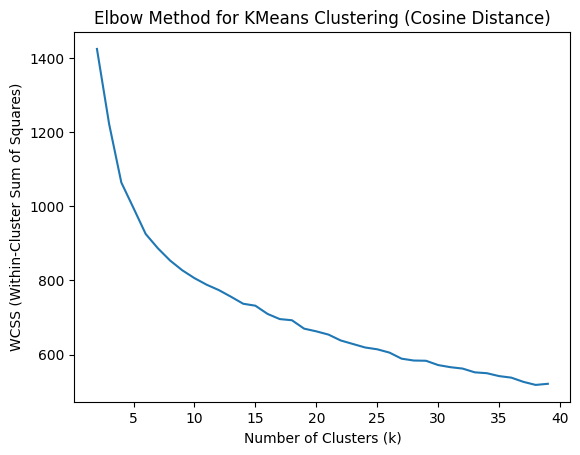

In [158]:
# from sklearn.cluster import KMeans
# from sklearn.metrics.pairwise import cosine_distances
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming 'k' is initially set to an arbitrary value (e.g., 25)
# k = 25  # Adjust this value as needed

# # Convert the embeddings to a numpy array
# embeddings_array = np.array(unique_vectors)

# # Normalize the embeddings
# normalize_embeddings = embeddings_array / np.linalg.norm(embeddings_array, axis=1, keepdims=True)

# # Pre-compute pairwise cosine distances
# pairwise_distances = cosine_distances(normalize_embeddings)

# # Define a range of k values to explore (adjust as needed)
# range_of_k = range(2, 40)

# # Create a list to store WCSS (Within-Cluster Sum of Squares) values for each k
# wcss_scores = []

# for k in range_of_k:
#   # Initialize and fit KMeans algorithm
#   kmeans_cosine = KMeans(n_clusters=k, random_state=42).fit(pairwise_distances)

#   # Calculate WCSS
#   wcss_val = kmeans_cosine.inertia_
#   wcss_scores.append(wcss_val)

# # Plot the WCSS scores vs k values
# plt.plot(range_of_k, wcss_scores)
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
# plt.title("Elbow Method for KMeans Clustering (Cosine Distance)")
# plt.show()

# # Analyze the plot to identify the "elbow" point (k with significant WCSS reduction)
# # This will be your tentative optimal k based on the Elbow Method

# # You can perform Silhouette Analysis (provided in the previous response)
# # to validate or refine the optimal k selection.

In [160]:
from collections import Counter

# Count the occurrences of each cluster label
cluster_counts = Counter(cluster_labels_clean_dff)

# Print the number of words in each cluster

for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} words")


Cluster 0: 56 words
Cluster 9: 44 words
Cluster 14: 81 words
Cluster 3: 57 words
Cluster 8: 12 words
Cluster 5: 55 words
Cluster 12: 15 words
Cluster 1: 13 words
Cluster 10: 41 words
Cluster 18: 38 words
Cluster 2: 25 words
Cluster 7: 13 words
Cluster 4: 17 words
Cluster 19: 11 words
Cluster 13: 9 words
Cluster 11: 16 words
Cluster 17: 12 words
Cluster 6: 7 words
Cluster 16: 17 words
Cluster 15: 12 words


In [161]:
# Assuming you have a function to obtain embeddings for your new data called get_text_embedding

# Step 1: Get embeddings for your new data
new_data_embedding = get_text_embedding('ulcer')
new_data_embedding=new_data_embedding[:551]
# Step 2: Normalize the embedding
new_data_normalized = new_data_embedding / np.linalg.norm(new_data_embedding)
print(new_data_normalized)


[-2.09575798e-02  6.80712983e-02 -1.79009642e-02 -1.51421037e-02
  4.32181507e-02 -5.06201340e-03  1.07438914e-01 -5.68763018e-02
 -1.56982113e-02 -5.35032935e-02 -5.47669753e-02 -1.22239562e-02
 -2.57472973e-02 -8.66243243e-02  1.14506586e-02  5.63439131e-02
 -9.93501488e-03 -3.30350250e-02 -7.61085078e-02 -1.25821857e-02
 -8.68990421e-02  4.65818448e-03 -5.31151285e-03  1.08749922e-02
 -1.50046665e-02  4.88786213e-02  4.72200736e-02 -3.35418098e-02
 -3.71377133e-02 -4.58429102e-03  1.56458803e-02  8.70719403e-02
  3.07351910e-02 -5.63389994e-02  3.56637351e-02 -5.42407036e-02
 -7.47297034e-02  6.43487880e-03 -2.79741082e-02  2.28066463e-02
 -2.65104556e-03  3.57520841e-02  1.11480122e-02  3.74967679e-02
 -1.51926040e-04  1.29083432e-02 -1.53725632e-02 -1.36019774e-02
 -3.07634752e-02 -1.27340155e-02  1.97486039e-02 -3.56632732e-02
 -1.08528929e-02 -3.27483267e-02  8.45313072e-03  5.25651127e-02
 -9.09210928e-03 -2.49421429e-02 -6.64543062e-02 -2.88124960e-02
 -1.65298078e-02 -3.64430

In [162]:
kmeans_cosine.cluster_centers_[0].size

551

In [163]:
# Step 1: Compute the cosine distances between the new data and each cluster centroid
new_data_distances = cosine_distances(new_data_normalized.reshape(1, -1), kmeans_cosine.cluster_centers_)

# Step 2: Predict the cluster label with the smallest distance
predicted_cluster_label = np.argmin(new_data_distances)

print("Predicted cluster label for new data:", predicted_cluster_label)


Predicted cluster label for new data: 1


In [164]:
new_df = clean_df[['Processed_Uses', 'Uses_embedding']].copy()

In [165]:
new_df

,Processed_Uses,Uses_embedding
0,cancer colon rectum non-small cell lung cancer...,"[-0.007215309, 0.015919829, -0.02401989, 0.008..."
1,bacterial,"[-0.005964385, -0.00097294647, 0.022523835, 0...."
2,bacterial,"[-0.005964385, -0.00097294647, 0.022523835, 0...."
3,cough mucus,"[0.0059850602, 0.004372101, 0.014151468, 0.002..."
4,gastroesophageal reflux ( acid reflux ) pepti...,"[-0.013700387, 0.014155108, -0.01598368, -0.01..."
...,...,...
11819,local anesthesia ( numb tissue specific area ),"[-0.004131457, 0.013899047, 0.0068847644, 0.01..."
11820,hypertension ( high blood pressure ),"[-0.02359097, 0.024901694, -0.0018069285, 0.00..."
11821,polycystic ovarian syndrome ( pcos ),"[0.0067438325, 0.01847305, -0.0037896058, -0.0..."
11822,erectile dysfunction,"[0.004387086, 0.011122018, 0.004975469, -0.012..."


In [166]:
# Assuming your DataFrame with two columns 'Processed_Uses' and 'Uses_embedding' is called 'new_df'

# Remove duplicates from 'Processed_Uses' column while keeping the first occurrence
new_df_unique = new_df.drop_duplicates(subset=['Processed_Uses'], keep='first')

# Display the DataFrame after removing duplicates
new_df_unique


,Processed_Uses,Uses_embedding
0,cancer colon rectum non-small cell lung cancer...,"[-0.007215309, 0.015919829, -0.02401989, 0.008..."
1,bacterial,"[-0.005964385, -0.00097294647, 0.022523835, 0...."
3,cough mucus,"[0.0059850602, 0.004372101, 0.014151468, 0.002..."
4,gastroesophageal reflux ( acid reflux ) pepti...,"[-0.013700387, 0.014155108, -0.01598368, -0.01..."
5,sneezing runny nose allergies allergic condition,"[0.005405815, -0.008676604, -0.0056874906, -0...."
...,...,...
11254,parasitic worm,"[-0.008212613, 0.03450599, -0.007954541, -0.02..."
11257,softening earwax,"[-0.0051579564, -0.0054062516, -0.023177352, -..."
11303,breast cancer cancer colon rectum,"[-0.011691628, 0.0119916, -0.027512277, 0.0034..."
11543,fungal eye fungal,"[0.010103466, 0.005344325, -0.05720996, 0.0513..."


In [167]:
import numpy as np

# Assuming your DataFrame is called 'new_df_unique' and the target vector is 'target_vector'

# Convert the 'Uses_embedding' column to numpy arrays
embeddings_array = np.array(new_df_unique['Uses_embedding'].tolist())

# # Find the index of the row where the 'Uses_embedding' vector matches the target vector
# matching_index = np.where(np.all(embeddings_array == target_vector, axis=1))[0]

# if len(matching_index) > 0:
#     # If there is a match, retrieve the corresponding row from the DataFrame
#     matching_row = new_df_unique.iloc[matching_index[0]]
#     print("Matching row:\n", matching_row)
# else:
#     print("No exact match found.")


In [168]:
from collections import defaultdict

# Initialize a dictionary to store vectors for each cluster
cluster_vectors = defaultdict(list)
# Populate the dictionary with vectors for each cluster
for vector, label in zip(unique_vectors, cluster_labels_cosine):
    cluster_vectors[label].append(vector)
# Print the cluster ID and corresponding representative vectors
for cluster_id, vectors in cluster_vectors.items():
    print(f"Cluster {cluster_id}:")
    for i, vector in enumerate(vectors):  # Print first 5 representative vectors for each cluster
        # print(f"    Vector {i+1}: {vector[:5]}")
        matching_index = np.where(np.all(embeddings_array == vector, axis=1))[0]
        if len(matching_index) > 0:
          # If a match is found, retrieve the corresponding row from the DataFrame
          matching_row = new_df_unique.iloc[matching_index[0]]
          processed_uses = matching_row['Processed_Uses']
          print(processed_uses)
          # print("Matching row:\n", matching_row)



Cluster 0:
uterine fibroid
kidney cancer soft tissue sarcoma
short term fluid replacement trauma dehydration
overactive bladder ( oab ) symptom
contraception heavy menstrual bleeding
parkinson 's  drug induced abnormal movement
urinary tract  ( utis )
ocular hypertension glaucoma
thrombophlebitis
infective diarrhea worm 
high cholesterol
high calcium level blood hyperparathyroidism
male hypogonadism
neuropathic  epilepsy/seizures
diabetes insipidus bed-wetting
glaucoma ocular hypertension
chronic obstructive pulmonary  ( copd )
epilepsy/seizures bipolar  migraine
chronic obstructive pulmonary  ( copd ) asthma
abnormal uterine bleeding endometriosis
pulmonary arterial hypertension ( pah )
multiple myeloma mantle-cell lymphoma
 dyspepsia
facial hirsutism ( excessive hair growth face )
lung  patient cystic fibrosis
diarrhea dysentery
blood cancer ( acute lymphocytic leukemia )
heart failure arrhythmia
patent ductus arteriosus ( pda )
cytomegalovirus
respiratory tract  associated viscid mu